[View in Colaboratory](https://colab.research.google.com/github/Kremer80/LEOgit/blob/master/zalando-model01.ipynb)

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0-rc1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

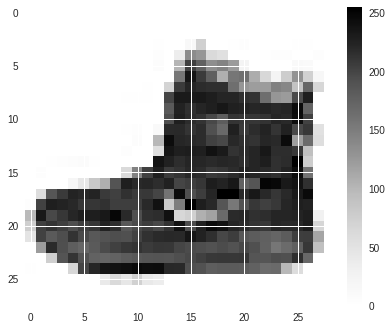

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(True)

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

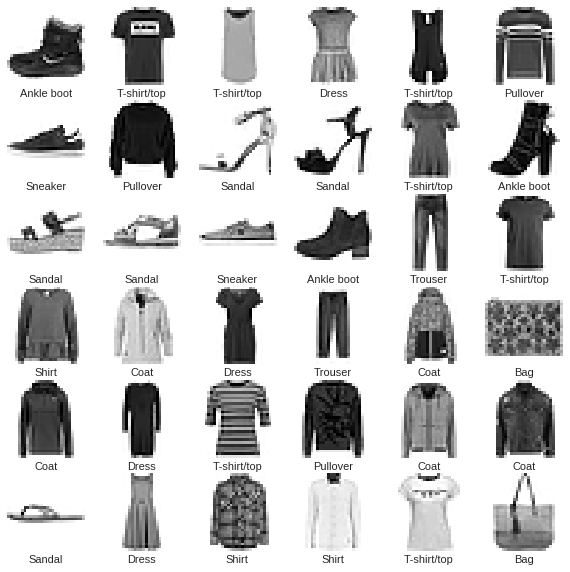

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
print(model)

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.4985 - acc: 0.8247
Epoch 2/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.3760 - acc: 0.8653
Epoch 3/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.3374 - acc: 0.8775
Epoch 4/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.3147 - acc: 0.8846
Epoch 5/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.2978 - acc: 0.8902


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 29us/step
Test accuracy: 0.8777


In [0]:
predictions = model.predict(test_images)

In [18]:
predictions[2]

array([5.8000951e-06, 9.9999332e-01, 5.9177189e-08, 6.9850535e-07,
       1.0028740e-07, 4.0551333e-11, 3.0196976e-08, 9.4659820e-15,
       5.2065097e-10, 4.4467258e-14], dtype=float32)

In [19]:
np.argmax(predictions[2])

1

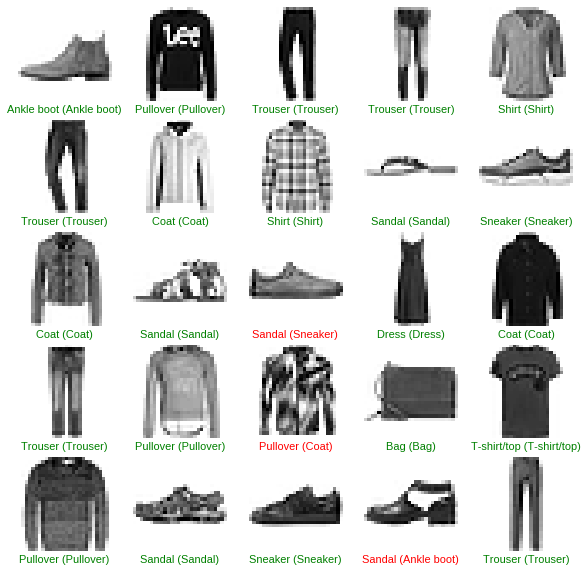

In [20]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)
      

In [21]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [22]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [23]:
predictions = model.predict(img)

print(predictions)

[[1.1296375e-05 1.0647894e-06 2.4511362e-06 9.6654400e-09 2.8888576e-06
  3.2331396e-02 5.2352825e-06 1.4184866e-02 8.4037729e-06 9.5345235e-01]]


In [24]:
prediction = predictions[0]

np.argmax(prediction)

9